In [ ]:
import numpy as np
import pandas as pd
import csv
import pickle
import os
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns
from keras.utils import np_utils
from keras.layers import LSTM, BatchNormalization, SimpleRNN
from keras import Input
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# enable gpu
from keras import backend as K
K._get_available_gpus()

[]

In [ ]:
def split_tuple(labels):
  label, snr = map(list, zip(*(x.split('_') for x in labels)))
  label,snr=np.array(label),np.array(snr)
  return label,snr

In [ ]:
def create_model():
  number_of_channels = 4 
  vanilla_rnn_model = Sequential()
  vanilla_rnn_model.add(Input(shape=(128,number_of_channels)))
  vanilla_rnn_model.add(SimpleRNN(128))
  vanilla_rnn_model.add(Dense(10, activation='softmax'))
  
  return vanilla_rnn_model  

In [ ]:
#change paths
samples = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/integral.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/labels.npy')
gc.collect()

137

In [ ]:
# to encode the labels
lb = LabelEncoder()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(samples, labels,test_size=0.3, random_state=1 ,stratify=labels)
del samples
del labels
gc.collect()
# take 5% of training set for validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=1,stratify=y_train)

y_train,snr_train = split_tuple(y_train)
y_test,snr_test = split_tuple(y_test)
y_val,snr_val=split_tuple(y_val)

# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
del y_train
del y_val
gc.collect()

0

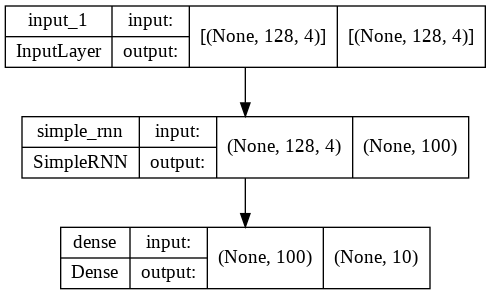

In [ ]:
# create model
model = create_model()
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

# Save an image of the model's architecture to a file
plot_model(model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

Epoch 1/15
24938/24938 [==============================] - 754s 30ms/step - loss: 2.1126 - accuracy: 0.1725 - val_loss: 1.9488 - val_accuracy: 0.2369
Epoch 2/15
24938/24938 [==============================] - 831s 33ms/step - loss: 1.8424 - accuracy: 0.2717 - val_loss: 1.7627 - val_accuracy: 0.2953
Epoch 3/15
24938/24938 [==============================] - 810s 32ms/step - loss: 1.6985 - accuracy: 0.3172 - val_loss: 1.6864 - val_accuracy: 0.3192
Epoch 4/15
24938/24938 [==============================] - 824s 33ms/step - loss: 1.6550 - accuracy: 0.3351 - val_loss: 1.6192 - val_accuracy: 0.3534
Epoch 5/15
24938/24938 [==============================] - 790s 32ms/step - loss: 1.6124 - accuracy: 0.3597 - val_loss: 1.5796 - val_accuracy: 0.3688
Epoch 6/15
24938/24938 [==============================] - 812s 33ms/step - loss: 1.5638 - accuracy: 0.3808 - val_loss: 1.6012 - val_accuracy: 0.3629
Epoch 7/15
24938/24938 [==============================] - 824s 33ms/step - loss: 1.5313 - accuracy: 0.3914

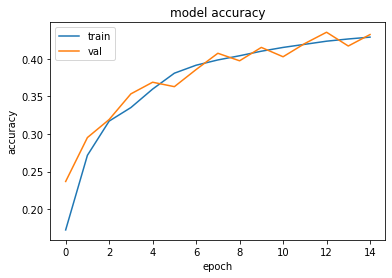

3858

In [ ]:
gc.collect()
model = create_model()
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 15,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb))
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/64_dropout_model.h5')
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/100_nodrop_model.h5')

Epoch 1/10
24938/24938 [==============================] - 768s 31ms/step - loss: 1.4087 - accuracy: 0.4317 - val_loss: 1.3826 - val_accuracy: 0.4412
Epoch 2/10
24938/24938 [==============================] - 773s 31ms/step - loss: 1.3985 - accuracy: 0.4337 - val_loss: 1.3828 - val_accuracy: 0.4356
Epoch 3/10
24938/24938 [==============================] - 783s 31ms/step - loss: 1.3797 - accuracy: 0.4385 - val_loss: 1.3430 - val_accuracy: 0.4524
Epoch 4/10
24938/24938 [==============================] - 781s 31ms/step - loss: 1.3417 - accuracy: 0.4516 - val_loss: 1.3065 - val_accuracy: 0.4627
Epoch 5/10
24938/24938 [==============================] - 776s 31ms/step - loss: 1.2881 - accuracy: 0.4707 - val_loss: 1.2464 - val_accuracy: 0.4864
Epoch 6/10
24938/24938 [==============================] - 793s 32ms/step - loss: 1.2515 - accuracy: 0.4846 - val_loss: 1.2208 - val_accuracy: 0.5005
Epoch 7/10
24938/24938 [==============================] - 831s 33ms/step - loss: 1.2230 - accuracy: 0.4945

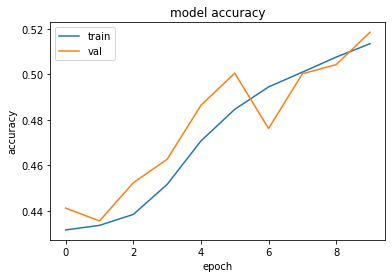

8648

In [ ]:
import keras
gc.collect()
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/100_nodrop_model.h5')
# opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)

# model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 10,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb))
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/100_nodrop_model.h5')
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

In [ ]:
del x_val
del y_val_lb
gc.collect()

In [ ]:
# train accuracy
score = model.evaluate(x_train, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

Training Accuracy:  0.5173671841621399


In [ ]:
del x_train
del y_train_lb
gc.collect()

In [ ]:
# evaluate test set
# encode labels
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

score = model.evaluate(x_test, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Testing Accuracy:  0.516700029373169


In [ ]:
del y_test
gc.collect()

In [ ]:
# to get confusion matrix
y_test_classes = y_test_lb.argmax(1)
y_predicted = model.predict(x_test)
y_pred_classes = np.argmax(y_predicted,axis=1)
classes = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/classes.npy')

In [ ]:
# get confusion matrix
confusion_matrix1 = confusion_matrix(y_true= y_test_classes, y_pred=y_pred_classes)
classes = np.array([x[0] for x in classes])
classes=np.unique(classes)
print(classes)
#Add labels to confusion matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix1, columns=list(classes), index=list(classes))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix1

[b'8PSK' b'AM-DSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16' b'QAM64'
 b'QPSK' b'WBFM']
The rows represents the true values or observations
The columns respresent the model's predictions


,b'8PSK',b'AM-DSB',b'BPSK',b'CPFSK',b'GFSK',b'PAM4',b'QAM16',b'QAM64',b'QPSK',b'WBFM'
b'8PSK',17217,694,4202,2128,1931,1343,1587,1297,5091,510
b'AM-DSB',1125,22153,2427,897,2075,519,147,14,1042,5601
b'BPSK',1795,755,24542,1425,1655,2702,492,161,1966,507
b'CPFSK',1825,784,3776,23173,2336,1050,536,84,1942,494
b'GFSK',1494,1101,3386,1906,24532,847,319,38,1497,880
b'PAM4',1190,592,4338,1007,1168,25279,462,268,1318,378
b'QAM16',2093,455,2802,1400,1304,1311,3333,21034,1941,327
b'QAM64',1574,303,1943,1034,988,1150,3383,23892,1530,203
b'QPSK',8021,734,4255,2098,1812,1319,1391,825,15038,507
b'WBFM',1086,16902,2552,936,5796,582,176,12,1105,6853


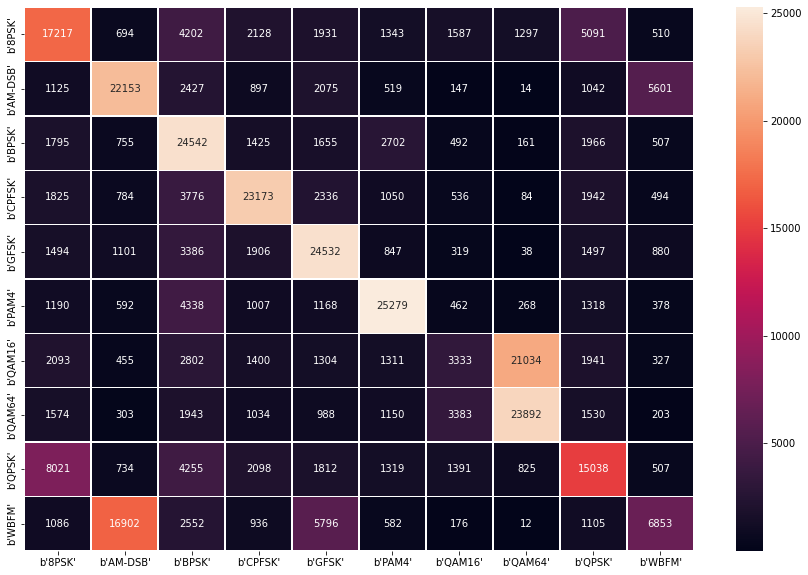

In [ ]:
# get most confusing classes
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(confusion_matrix1, annot=True, linewidths=.5, ax=ax, fmt='g')

In [ ]:
# Print f1, precision, and recall scores
print("Percision: ",precision_score(y_test_classes, y_pred_classes , average="macro"))
print("Recall: ",recall_score(y_test_classes, y_pred_classes , average="macro"))
print("F-score: ",f1_score(y_test_classes, y_pred_classes , average="macro"))

Percision:  0.49854739189524666
Recall:  0.5166999999999999
F-score:  0.49371767138430045


In [ ]:
# group by snr
snr_test = [int(snr) for snr in snr_test]
sorted_snrs = np.sort(np.unique(snr_test))
x = []
y = []
for snr in sorted_snrs:
  idx = np.where(snr_test == snr)
  x.append(snr)
  y.append(accuracy_score(np.argmax(y_test_lb[idx], axis = 1), np.argmax(y_predicted[idx], axis = 1)))


In [ ]:
# print results of snr
pd.DataFrame(data = np.array(y).reshape(1, -1) * 100,  columns = sorted_snrs, index = ['accuracy']).round(2)

,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18
accuracy,10.73,10.88,11.77,13.48,19.61,27.52,34.22,41.77,54.12,64.82,71.18,73.46,74.4,75.11,75.11,75.23,74.91,75.19,75.14,74.75


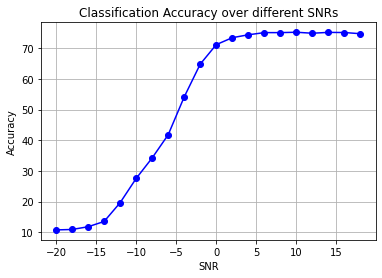

In [ ]:
# plot accuracy vs snr
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy over different SNRs')
plt.plot(x, np.array(y) * 100, 'bo-')
plt.grid(True)